<a href="https://colab.research.google.com/github/aanandunnis/Bank-Turnover-Dataset/blob/main/Bank%20Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets 

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: unniznd
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 38.4MB/s]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [88]:
df = pd.read_csv('/content/bank-customer-churn-modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
df.drop(['RowNumber','CustomerId'],axis=1 ,inplace=True)

In [90]:
df.drop(['Surname'],axis=1,inplace=True)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
left_num = df[df['Exited'] == 1].Gender.value_counts()
left_num.index

Index(['Female', 'Male'], dtype='object')

<BarContainer object of 2 artists>

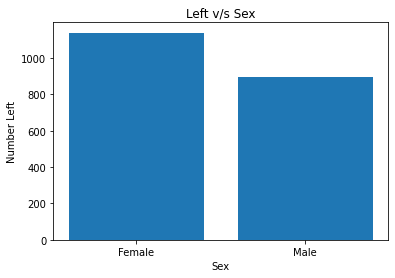

In [ ]:
plt.ylabel('Number Left')
plt.xlabel('Sex')
plt.title('Left v/s Sex')
plt.bar(left_num.index,left_num.values)

<BarContainer object of 2 artists>

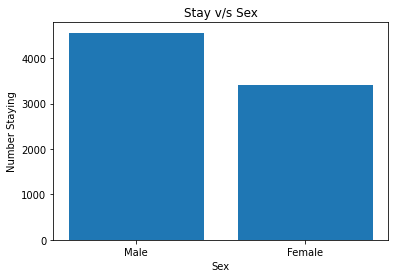

In [52]:
stay_num = df[df['Exited'] == 0].Gender.value_counts()
plt.ylabel('Number Staying')
plt.xlabel('Sex')
plt.title('Stay v/s Sex')
plt.bar(stay_num.index,stay_num.values)

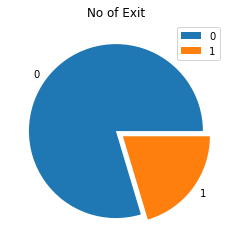

In [ ]:
exited_count = df.Exited.value_counts()
plt.title('No of Exit')
plt.pie(exited_count, labels = exited_count.index, explode = [0,0.1])
plt.legend()

In [49]:
country_left = df[df['Exited'] == 1].Geography.value_counts()
country_stay = df[df['Exited'] == 0].Geography.value_counts()


<BarContainer object of 3 artists>

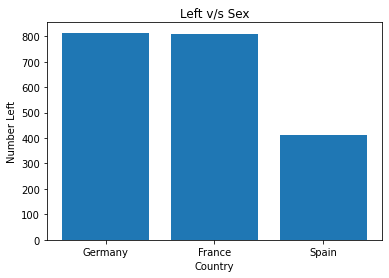

In [50]:
plt.ylabel('Number Left')
plt.xlabel('Country')
plt.title('Left v/s Sex')
plt.bar(country_left.index,country_left.values)

<BarContainer object of 3 artists>

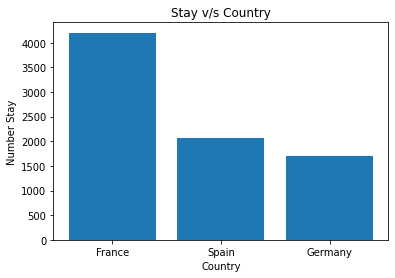

In [60]:
plt.ylabel('Number Stay')
plt.xlabel('Country')
plt.title('Stay v/s Country')
plt.bar(country_stay.index,country_stay.values)

<BarContainer object of 2 artists>

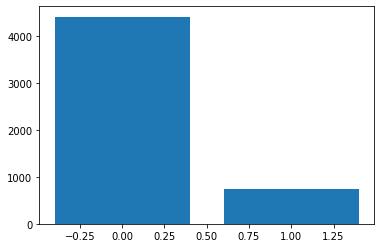

In [69]:
activeMember_left = df[df['IsActiveMember'] == 1].Exited.value_counts()
plt.bar(activeMember_left.index,activeMember_left.values)


In [91]:
df.replace({'Male':0,'Female':1},inplace=True)

In [93]:
df = pd.concat([df,pd.get_dummies(df['Geography'])],axis = 1)

In [96]:
df.drop(['Geography','Spain'],axis=1,inplace=True)

In [99]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [101]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [103]:
X[['Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X[['Age','Tenure','Balance','EstimatedSalary']])


In [104]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
0,619,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,0
1,608,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0
2,502,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,0
3,699,1,0.283784,0.1,0.000000,2,0,0,0.469120,1,0
4,850,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

In [153]:
model = keras.Sequential([
        keras.layers.Dense(20,input_shape = (11,),activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train, y_train,epochs=100)

In [156]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [157]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       794
           1       0.74      0.11      0.19       206

    accuracy                           0.81      1000
   macro avg       0.78      0.55      0.54      1000
weighted avg       0.80      0.81      0.75      1000



In [158]:
cm = confusion_matrix(y_pred,y_test)

Text(69.0, 0.5, 'Truth')

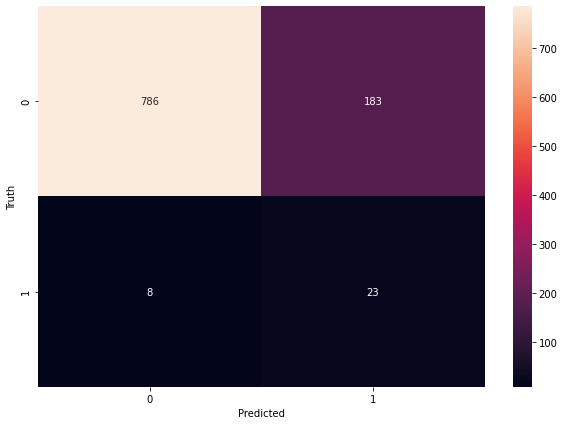

In [159]:
import seaborn as sns



plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d',color='Blue')
plt.xlabel('Predicted')
plt.ylabel('Truth')